### Simple Linear Regression from Scratch

In [1]:
# Define the dataset
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

In [2]:
# Function to Split a dataset into a train set and a test set
def train_test_split(dataset, split):
	train_size = split * len(dataset)
	train = [dataset[i][0:2] for i in range(0, int(train_size))]
	test = [dataset[i][0:2] for i in range(int(train_size), len(dataset))]
	return train, test

In [3]:
# Split dataset into 50% train and 50% test
train, test = train_test_split(dataset, split=0.5)
print(train, test)

x = [row[0] for row in train]
y = [row[1] for row in train]
print(x, y)

[[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]] [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
[1, 2, 4, 3, 5] [1, 3, 3, 2, 5]


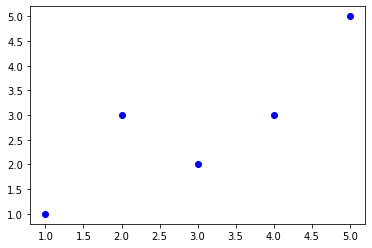

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

# plot train set datapoints
plt.plot(x, y, 'bo')

In [5]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

In [6]:
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [7]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [8]:
# calculate mean, variance, and covariance
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
covar = covariance(x, mean_x, y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))
print('Covariance: %.3f' % (covar))

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800
Covariance: 8.000


In [9]:
# Calculate coefficients b0 and b1
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

In [10]:
# calculate coefficients on train set
b0, b1 = coefficients(train)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.400, B1=0.800


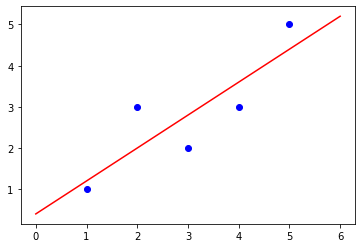

In [11]:
# plot train datapoints
plt.plot(x, y, 'bo')

# plot the regrssion line with coefficients b0 and b1
x_values = [i for i in range(int(min(x))-1, int(max(x))+2)]
y_values = [(b1*x + b0) for x in x_values]
plt.plot(x_values, y_values, 'r')

In [12]:
# make predictions
def simple_linear_regression(train, test, b0, b1):
	predictions = list()
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions

In [13]:
# predicts on training set
predictions = simple_linear_regression(train, test, b0, b1)
print(predictions)

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


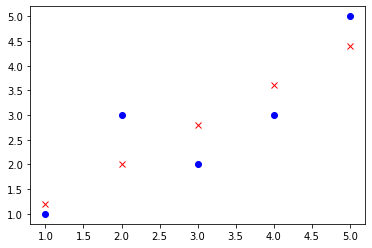

In [14]:
# plot train datapoints - blue dots
plt.plot(x, y, 'bo')

# plot predictions datapoints - red x
plt.plot(x, predictions, 'rx')

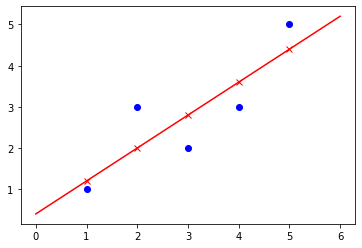

In [15]:
# plot train datapoints
plt.plot(x, y, 'bo')

# plot predictions datapoints
plt.plot(x, predictions, 'rx')

# plot the regrssion line with coefficients b0 and b1 - red line
x_values = [i for i in range(int(min(x))-1, int(max(x))+2)]
y_values = [(b1*x + b0) for x in x_values]
plt.plot(x_values, y_values, 'r')

In [16]:
# Calculate root mean squared error
from math import sqrt
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [17]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm, b0, b1):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set, b0, b1)
	print(predicted)
	actual = [row[-1] for row in dataset]
	rmse = rmse_metric(actual, predicted)
	return rmse

In [18]:
# Test simple linear regression
rmse = evaluate_algorithm(train, simple_linear_regression, b0, b1)
print('RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


### Linear Regression with Gradient Descent from scratch

In [19]:
x, y

([1, 2, 4, 3, 5], [1, 3, 3, 2, 5])

In [20]:
# Convert x list into numpy array
import numpy as np
X = np.asarray(x, dtype=np.float64)

In [34]:
# Building the model

# init coefficients m (=b1) and c (=b0) to 0
m = 0
c = 0

# initialize learning rate L and number of epochs (iterations to perform gradient descent)
L = 0.001  #0.01
epochs = 170  #3

# Number of elements in X
n = float(len(x)) 

# Performing Gradient Descent 
for i in range(epochs): 
    #Y_pred =  c + m * row[0]
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    print('>epoch=%d, lrate=%.3f, m=%f, c=%f' % (i, L, m, c))
    
print (m, c)

>epoch=0, lrate=0.001, m=0.020000, c=0.005600
>epoch=1, lrate=0.001, m=0.039526, c=0.011069
>epoch=2, lrate=0.001, m=0.058590, c=0.016410
>epoch=3, lrate=0.001, m=0.077203, c=0.021625
>epoch=4, lrate=0.001, m=0.095375, c=0.026719
>epoch=5, lrate=0.001, m=0.113116, c=0.031693
>epoch=6, lrate=0.001, m=0.130437, c=0.036551
>epoch=7, lrate=0.001, m=0.147349, c=0.041295
>epoch=8, lrate=0.001, m=0.163859, c=0.045928
>epoch=9, lrate=0.001, m=0.179979, c=0.050453
>epoch=10, lrate=0.001, m=0.195716, c=0.054873
>epoch=11, lrate=0.001, m=0.211081, c=0.059189
>epoch=12, lrate=0.001, m=0.226082, c=0.063404
>epoch=13, lrate=0.001, m=0.240728, c=0.067520
>epoch=14, lrate=0.001, m=0.255027, c=0.071541
>epoch=15, lrate=0.001, m=0.268987, c=0.075468
>epoch=16, lrate=0.001, m=0.282617, c=0.079303
>epoch=17, lrate=0.001, m=0.295923, c=0.083049
>epoch=18, lrate=0.001, m=0.308915, c=0.086707
>epoch=19, lrate=0.001, m=0.321598, c=0.090280
>epoch=20, lrate=0.001, m=0.333982, c=0.093770
>epoch=21, lrate=0.001,

In [35]:
# predicts on training set
predictions_gd = simple_linear_regression(train, test, c, m)
print(predictions_gd)

[1.0684581481874074, 1.8973574542116272, 3.5551560662600665, 2.726256760235847, 4.384055372284286]


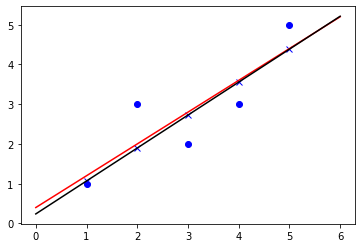

In [36]:
# plot train datapoints
plt.plot(x, y, 'bo')

# plot predictions datapoints
plt.plot(x, predictions_gd, 'bx')

# plot the simple regrssion line with coefficients b0 and b1
x_values = [i for i in range(int(min(x))-1, int(max(x))+2)]
y_values = [(b1*x + b0) for x in x_values]
plt.plot(x_values, y_values, 'r')

# plot the gradient decent regrssion line with coefficients c and m - black line
x_values = [i for i in range(int(min(x))-1, int(max(x))+2)]
y_values = [(m*x + c) for x in x_values]
plt.plot(x_values, y_values, 'black')

In [37]:
# Test simple linear regression
rmse = evaluate_algorithm(train, simple_linear_regression, c, m)
print('RMSE: %.3f' % (rmse))

[1.0684581481874074, 1.8973574542116272, 3.5551560662600665, 2.726256760235847, 4.384055372284286]
RMSE: 0.698


#### Ref 1 : https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
#### Ref 2 : https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
#### Ref 3 : https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931